# Ensemble Methods

The list of all the functions along with their documentations is given below:

- [BaggingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier)
- [BaggingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor)
- [RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
- [RandomForestRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
- [ExtraTreesClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier)
- [ExtraTreesRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html#sklearn.ensemble.ExtraTreesRegressor)
- [AdaBoostClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier)
- [AdaBoostRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

In [81]:
from sklearn import ensemble, neighbors, datasets, linear_model, naive_bayes, svm, neighbors, tree
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

## Bagging
Short for bootstrap aggregation. In scikit-learn, bagging methods are offered as a unified `BaggingClassifier` meta-estimator (resp. `BaggingRegressor`), taking as input a user-specified base estimator along with parameters specifying the strategy to draw random subsets. In particular, `max_samples` and `max_features` control the size of the subsets (in terms of samples and features), while `bootstrap` and `bootstrap_features` control whether samples and features are drawn with or without replacement. When using a subset of the available samples the generalization accuracy can be estimated with the out-of-bag samples by setting `oob_score=True`. **Bagging can also be parallelized using teh `n_jobs` argument.**

#### Fitting a bagging model
Fitting a KNN model on iris data set using bagging

In [2]:
bagging = ensemble.BaggingClassifier(neighbors.KNeighborsClassifier(), max_samples=0.5, 
                            max_features=0.5, oob_score = True, 
                            random_state = 2017-12-29)

n_neighbors = 15
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [3]:
bagging.fit(X,y)
print(bagging.base_estimator_) # the base estimator
print(bagging.classes_) # class labels
print(bagging.oob_score_) # out of bag success rate

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
[0 1 2]
0.946666666667


#### Prediction using bagging

In [4]:
pred = bagging.predict(X)
cmat = confusion_matrix(y, pred)
accuracy = round(100*cmat.diagonal().sum()/cmat.sum())
print(cmat)
print(accuracy)

[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]
99.0


### Regression using bagging
Regression can also be done in a similar way by just using the base estimator as a regression model in `ensemble.BaggingRegressor`. One example is provided [here](http://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py).

## Random Forests

`RandomForestClassifier` and `RandomForestRegressor` are used for classification and regression respectively. The importance of features is stored in the attribute `feature_importances_` of the fitted object of the above two classes.

Each tree in the ensemble is built from a bootstrap sample drawn from the training set. The split is picked as the best split among a random subset of the features, instead of all features.

## Extra Trees

Short for Extremely Randomized Trees. `ExtraTreesClassifier` and `ExtraTreesRegressor` are used for classification and regression respectively.

In extremely randomized trees, randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias.

## Best Choices for Parameters

The main parameters to adjust when using these methods is `n_estimators` and `max_features`. The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees. The latter is the size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias. **Empirical good default values are `max_features=n_features` for regression problems, and `max_features=sqrt(n_features)` for classification** tasks (where `n_features` is the number of features in the data). Good results are often achieved when setting **`max_depth=None`** in combination with **`min_samples_split=2`** (i.e., when fully developing the trees). Bear in mind though that these values are usually not optimal, and might result in models that consume a lot of RAM. **The best parameter values should always be cross-validated**. In addition, note that **in random forests, bootstrap samples are used by default (`bootstrap=True`) while the default strategy for extra-trees is to use the whole dataset (`bootstrap=False`)**. When using bootstrap sampling the generalization accuracy can be estimated on the left out or out-of-bag samples. This can be enabled by setting `oob_score=True`.

## Parallelization

Finally, this module also features the parallel construction of the trees and the parallel computation of the predictions through the n_jobs parameter. If n_jobs=k then computations are partitioned into k jobs, and run on k cores of the machine. If n_jobs=-1 then all cores available on the machine are used.

## Feature importance evaluation

[Example](http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)

The relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the target variable. In practice those estimates are stored as an attribute named `feature_importances_` on the fitted model. This is an array with shape (`n_features`,) whose values are positive and sum to 1.0. The higher the value, the more important is the contribution of the matching feature to the prediction function.

### Random Forest Regression Example

In [30]:
diabetes = datasets.load_diabetes()
X_train = diabetes.data[:-20]
X_test = diabetes.data[-20:]
y_train = diabetes.target[:-20]
y_test = diabetes.target[-20:]
rf = ensemble.RandomForestRegressor(n_estimators = 1000, oob_score = True, n_jobs = -1, random_state = 0)
rf.fit(X_train,y_train)
print(rf.oob_score_)
pred = rf.predict(X_test)
print("MSPE for random forest regressor =", mean_squared_error(y_test, pred))
rf.feature_importances_

0.430877319766
MSPE for random forest regressor = 2871.62210986


array([ 0.06379473,  0.01113133,  0.27151075,  0.09616855,  0.04525399,
        0.05564851,  0.05086904,  0.02331249,  0.30735058,  0.07496003])

### Plotting Feature Importances

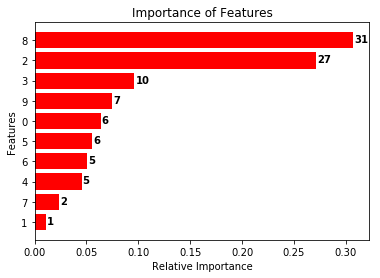

In [67]:
importances = rf.feature_importances_
indices = np.argsort(importances) # sorts the indices of the array, like 'order' in R
importances = importances[indices] # putting importances in the sorted order

# plotting the barplot horizontally
plt.barh(range(len(importances)),importances, color = "red")
plt.title("Importance of Features")
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.yticks(range(len(importances)), indices)
for i, v in enumerate(importances): # displaying the relative importance alongside each bar in the plot
    plt.text(v + 0.001, i - 0.1, str(int(round(v,2)*100)), fontweight='bold')
plt.show()

### Extra Trees Regression Example

In [68]:
extra = ensemble.ExtraTreesRegressor(n_estimators = 10, bootstrap = True, oob_score = True, n_jobs = -1, random_state = 0)
extra.fit(X_train,y_train)
extra.oob_score_
pred = extra.predict(X_test)
print("MSPE for random forest regressor =", mean_squared_error(y_test, pred))

MSPE for random forest regressor = 2327.268


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


We might sometimes get a warning in computing `oob_score_` because it is possible that while resampling using bootstrap, some observations get selected in all the samples. These observations will never be "out-of-bag" and hence, we cannot calculate the OOB estimate for these observations.

Extra trees perform much better than random forest but still not better than linear regression. This model could be improved by parameter tuning, like cross-validation or grid search.

## AdaBoost

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights $w_1$, $w_2$, $\dots$, $w_N$ to each of the training samples. Initially, those weights are all set to $w_i = 1/N$, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence.

[`AdaBoostClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for classification, [`AdaBoostRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor) for regression.

In [70]:
iris = datasets.load_iris()
clf = ensemble.AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, iris.data, iris.target)
scores.mean()

0.95996732026143794

#### Parameters in AdaBoost

The number of weak learners is controlled by the parameter n_estimators. The learning_rate parameter controls the contribution of the weak learners in the final combination. By default, weak learners are decision stumps. Different weak learners can be specified through the base_estimator parameter. The main parameters to tune to obtain good results are n_estimators and the complexity of the base estimators (e.g., its depth max_depth or minimum required number of samples at a leaf min_samples_leaf in case of decision trees).

## Gradient Tree Boosting

[GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier) for classification and [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor) for regression.

### Classification example

In [72]:
X, y = datasets.make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.91300000000000003

**For datasets with a large number of classes we strongly recommend to use RandomForestClassifier as an alternative to GradientBoostingClassifier.**

### Regression example

In [73]:
X, y = datasets.make_friedman1(n_samples=1200, random_state=0, noise=1.0)
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]
est = ensemble.GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, 
                                         random_state=0, loss='ls')
est.fit(X_train, y_train)
mean_squared_error(y_test, est.predict(X_test))

5.0091548599603213

## Voting classifier

The idea behind the `VotingClassifier` is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. 

### Hard Voting

The `VotingClassifier` (with `voting='hard'`) would classify the sample as “class 1” based on the majority class label.

In [76]:
iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

clf1 = linear_model.LogisticRegression(random_state=1)
clf2 = ensemble.RandomForestClassifier(random_state=1)
clf3 = naive_bayes.GaussianNB()

eclf = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Voting Classifier']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [naive Bayes]
Accuracy: 0.95 (+/- 0.05) [Voting Classifier]


### Soft Voting
In contrast to majority voting (hard voting), soft voting returns the class label as argmax of the sum of predicted probabilities.

In [80]:
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target

# Training classifiers
clf1 = tree.DecisionTreeClassifier(max_depth=4)
clf2 = neighbors.KNeighborsClassifier(n_neighbors=7)
clf3 = svm.SVC(kernel='rbf', probability=True)
eclf = ensemble.VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)], voting='soft', weights=[2,1,2])

clf1 = clf1.fit(X,y)
clf2 = clf2.fit(X,y)
clf3 = clf3.fit(X,y)
eclf = eclf.fit(X,y)

### Using the VotingClassifier with GridSearch


In [82]:
clf1 = linear_model.LogisticRegression(random_state=1)
clf2 = ensemble.RandomForestClassifier(random_state=1)
clf3 = naive_bayes.GaussianNB()
eclf = ensemble.VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(iris.data, iris.target)

In [ ]:
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')